In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv("../data/master/features/features.csv")
features.shape

(45885, 22)

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45885 entries, 0 to 45884
Data columns (total 22 columns):
num                       45885 non-null int64
record-number             45885 non-null int64
filename                  40201 non-null object
pdfismissing              45885 non-null int64
author                    45885 non-null object
fulltitle                 45885 non-null object
subtitle                  45023 non-null object
pages                     45885 non-null object
volume                    44304 non-null object
number                    43726 non-null object
keywords                  45885 non-null object
searchquery_terms         45885 non-null object
classifications           45885 non-null object
cancer_types              45885 non-null object
label_top_level           45885 non-null object
useful                    45885 non-null int64
review_article            45885 non-null int64
not_allowed_in_germany    45885 non-null object
year                      45885 

In [4]:
features.head(5)

,num,record-number,filename,pdfismissing,author,fulltitle,subtitle,pages,volume,number,...,classifications,cancer_types,label_top_level,useful,review_article,not_allowed_in_germany,year,abstract,pub-location,publisher
0,1,6667,NaN,0,[],Prolongation of the disease-free interval in s...,The New England journal of medicine,1465-1472,312,6667_1985,...,[],[],[],0,0,[],1985,To assess the effects of postoperative radiati...,NaN,NaN
1,2,6668,6668_1990.pdf,0,[],NIH consensus conference. Adjuvant therapy for...,JAMA,1444-1450,264,6668_1990,...,[],[],[],0,0,[],1990,NaN,NaN,NaN
2,3,19866,NaN,0,[],American College of Sports Medicine position s...,Medicine and Science in Sports and Exercise,265-274,22,19866_1990,...,"['basis,6-bew']",['basis'],['6'],1,0,[],1990,"The combination of frequency, intensity, and d...",NaN,NaN
3,4,22005,22005_1993.pdf,0,[],A predictive model for aggressive non-Hodgkin'...,N.Engl.J.Med.,987-994,329,22005_1993,...,[],[],[],0,0,[],1993,BACKGROUND: Although many patients with interm...,NaN,NaN
4,5,2050,NaN,0,"['Hermanek,P.','Marzoli,G.P.']",Lokale Therapie des Rektumkarzinoms. Verfahren...,NaN,-,NaN,2050_hermanek1994,...,[],[],[],0,0,[],1994,NaN,Berlin Heidelberg Ney York Tokyo,Springer


In [5]:
features = features.fillna("")

In [6]:
features.groupby('review_article')['num'].agg('count')

review_article
0    40630
1     5255
Name: num, dtype: int64

# partition data by indicators

not too useful for now, maybe need fulltext for that

In [49]:
def indicator_for(row):
    words = ['medline', 'pubmed', 'embase', 'cochrane', 'cochrane library', 'ovid', 'google scholar']
    return [1.0 if row['review_article'] == 1 and word.lower() in row.abstract.lower().split(" ") else 0.0 for word in words]

def indicator_count_for(row):
    words = ['medline', 'pubmed', 'embase', 'cochrane', 'cochrane library', 'ovid', 'google scholar']
    return np.sum([1.0 if row['review_article'] == 1 and word.lower() in row.abstract.lower().split(" ") else 0.0 for word in words])

features['db_inds'] = features.apply(indicator_for, axis=1)
features['db_ind_counts'] = features.apply(indicator_count_for, axis=1)
features['db_ind_any'] = features.db_ind_counts > 0
features['db_ind_ge_1'] = features.db_ind_counts > 1

In [50]:
features.groupby(['useful', 'review_article', 'db_ind_ge_1'])[['num', 'num']].count()

num    num
useful review_article db_ind_ge_1              
0      0              False        24299  24299
       1              False          437    437
                      True            61     61
1      0              False        16331  16331
       1              False         4025   4025
                      True           732    732

In [77]:
for filename in features[0:10].filename.dropna().values:
    print glob("data/master/texts/{}".format(filename.replace(".pdf", ".txt")))
    break

[]


In [5]:
features.filename.dropna().shape

(40201,)

In [6]:
len(features.publisher.unique())

6470

In [7]:
features.groupby('useful')['num'].agg('count')

useful
0    24797
1    21088
Name: num, dtype: int64

In [8]:
features['n_classifications'] = features.classifications.apply(lambda r: len(r))

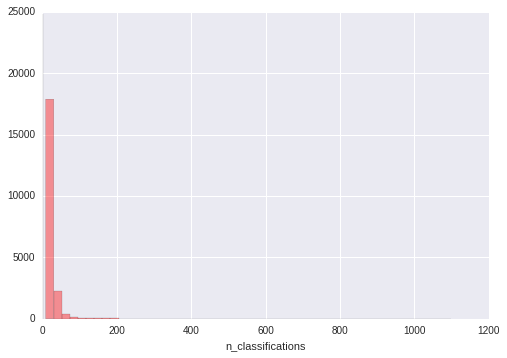

In [9]:
sns.distplot(features[features['useful'] == 0.0]['n_classifications'], kde=False)
sns.distplot(features[features['useful'] == 1.0]['n_classifications'], color='red', kde=False)

In [10]:
features.groupby(['n_classifications', 'useful'])['num'].agg('count')

n_classifications  useful
2                  0         24797
9                  1            12
10                 1            14
11                 1           104
12                 1            54
13                 1           234
14                 1          1423
15                 1          1692
16                 1          1360
17                 1          1680
18                 1          1710
19                 1          1513
20                 1          2024
21                 1          1061
22                 1          1008
23                 1           908
24                 1           472
25                 1           439
26                 1           793
27                 1           284
28                 1           511
29                 1           213
30                 1           381
31                 1           413
32                 1           206
33                 1           200
34                 1           130
35                 1         

In [11]:
features[['classifications', 'useful', 'n_classifications']]

,classifications,useful,n_classifications
0,[],0,2
1,[],0,2
2,"['basis,6-bew']",1,15
3,[],0,2
4,[],0,2
5,[],0,2
6,[],0,2
7,[],0,2
8,[],0,2
9,[],0,2


In [12]:
def npagest(s):
    try:
        t = s.split("-")
        return int(t[1]) - int(t[0])
    except:
        return np.nan

features['npages'] = features['pages'].apply(npagest)

In [13]:
features['n_authors'] = features['author'].apply(lambda r: len(r))

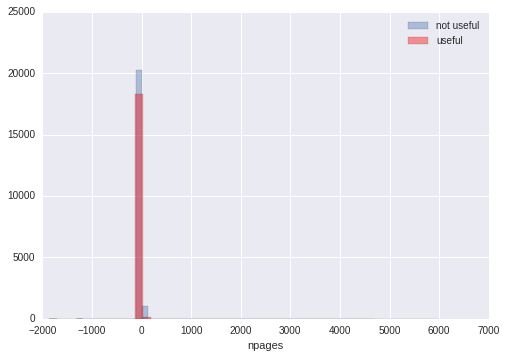

In [14]:
sns.distplot(features[features['useful'] == 0]['npages'].dropna(), kde=False)
sns.distplot(features[features['useful'] == 1]['npages'].dropna(), color='r', kde=False)
plt.legend(['not useful', 'useful'])

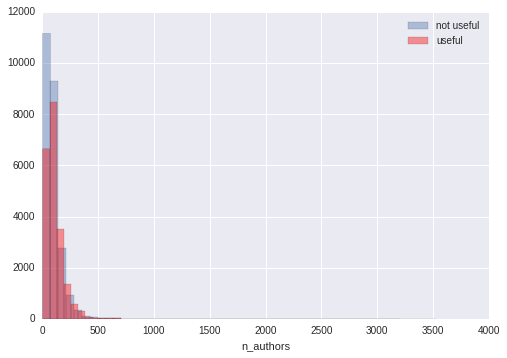

In [15]:

sns.distplot(features[features['useful'] == 0]['n_authors'].dropna(), kde=False)
sns.distplot(features[features['useful'] == 1]['n_authors'].dropna(), color='r', kde=False)
plt.legend(['not useful', 'useful'])

In [16]:
features.groupby(['pdfismissing', 'useful']).agg('count')['num'].reset_index()

,pdfismissing,useful,num
0,0,0,24619
1,0,1,20926
2,1,0,178
3,1,1,162


In [17]:
20926.0/24619, 162.0/178

(0.8499939071448881, 0.9101123595505618)

# abstract encoding

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=32).fit_transform(features.abstract.fillna(""))
tfidf.shape

(45885, 32)

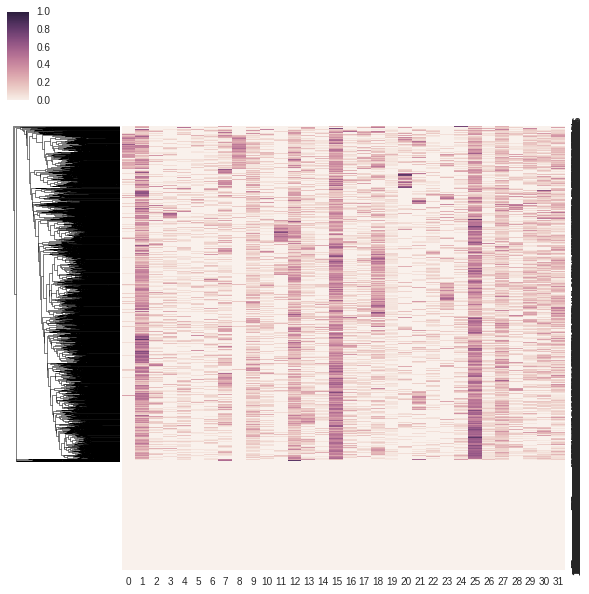

In [23]:
idcs = np.where(features['useful'] == 0.0)[0][0:2000]
sns.clustermap(tfidf[idcs, :].toarray(), col_cluster=False)

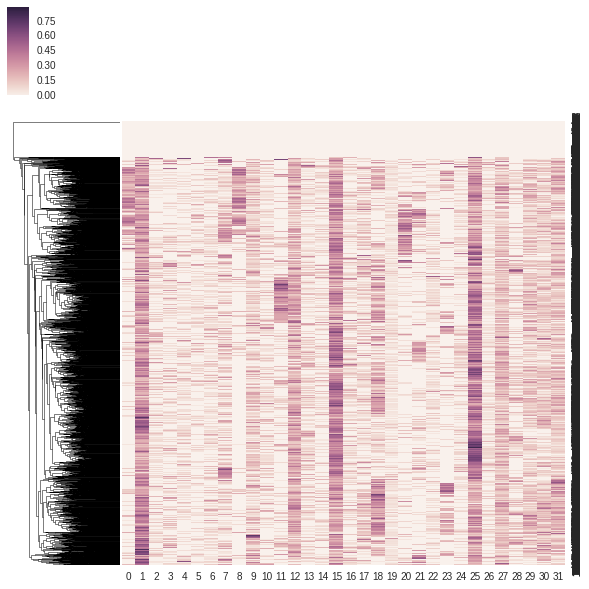

In [24]:
idcs = np.where(features['useful'] == 1.0)[0][0:2000]
sns.clustermap(tfidf[idcs, :].toarray(), col_cluster=False)

# tokenized words label dependencies

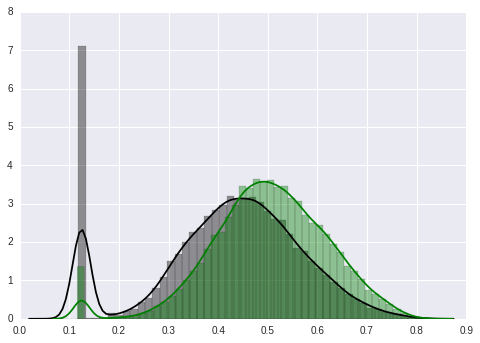

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = features.useful.apply(lambda r: bool(r))
clf = LogisticRegression().fit(tfidf, y)

probas = clf.predict_proba(tfidf)
sns.distplot(probas[np.where(y == False), 1], color='black')
sns.distplot(probas[np.where(y == True), 1], color='green')

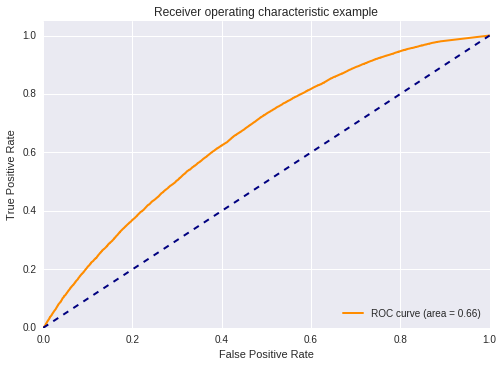

In [72]:
from sklearn.metrics import roc_curve, auc
# (y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)[source]


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# roc curves for different tfidf encodings

In [96]:
max_feats = [8, 16, 32, 64, 128, 256, 512, 1024]
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'brown', 'r']
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = features.useful.apply(lambda r: bool(r))
# probas = clf.predict_proba(tfidf)
# sns.distplot(probas[np.where(y == False), 1], color='black')
# sns.distplot(probas[np.where(y == True), 1], color='green')

all_probas = []
fprs, tprs, roc_aucs = [], [], []

for f in max_feats:
    tfidf = TfidfVectorizer(max_features=f).fit_transform(features.abstract.fillna(""))
#     tfidf = HashingVectorizer(n_features=f).fit_transform(features.abstract.fillna(""))
    clf = LogisticRegression().fit(tfidf, y)
    probas = clf.predict_proba(tfidf)
    fpr, tpr, _  = roc_curve(y, probas[:,1])
    roc_auc = auc(fpr, tpr)

    all_probas.append(probas)
    fprs.append(fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)



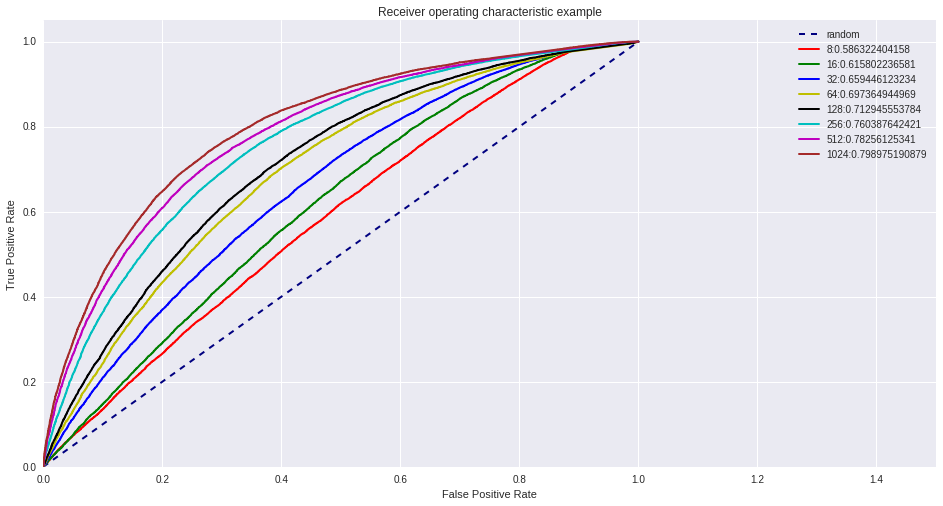

In [97]:
from sklearn.metrics import roc_curve, auc
# (y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)[source]

plt.figure(figsize=(16, 8))
lw = 2

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

for i in range(len(roc_aucs)):
    plt.plot(fprs[i], tprs[i], color=colors[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_aucs[i])
    plt.xlim([0.0, 1.5])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")

l = map(lambda e: str(e[0]) + ":" + str(e[1]), zip(max_feats, roc_aucs))
plt.legend(['random'] + l)
# plt.show()

In [80]:
import xgboost as xgb

In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

from sklearn.pipeline import Pipeline

vec = TfidfVectorizer(max_features=32)
logreg = LogisticRegression()
# rf = RandomForestClassifier()
clf = Pipeline([('tfidf', vec), ('logreg', logreg)])
y = features.useful.apply(lambda r: bool(r))
X = features.abstract.fillna("")



# clf.fit(features.abstract.fillna(""), y)
def roc_auc_scorer(y_true, y_pred):
    return roc_auc_score(y_true, y_pred[:, 1])

# # scorer = make_scorer(roc_auc_score)
scorer = make_scorer(roc_auc_scorer, needs_proba=True)

grid = {
    'tfidf__max_features': [512],
    'logreg__C': [1e-3, 1e-2, 1e-1]
}

cv = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=3, scoring=scorer, verbose=1)
cv.fit(X, y)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   29.2s remaining:   36.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   41.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=32, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'logreg__C': [0.001, 0.01, 0.1], 'tfidf__max_features': [512]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(roc_auc_scorer, needs_proba=True), verbose=1)

In [9]:

from model_selection.cv import cv_debug

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

vec = TfidfVectorizer(max_features=32)
logreg = LogisticRegression()
# rf = RandomForestClassifier()
clf = Pipeline([('tfidf', vec), ('logreg', logreg)])
y = features.useful.apply(lambda r: bool(r))
X = features.abstract.fillna("")

def roc_auc_scorer(y_true, y_pred):
    return roc_auc_score(y_true, y_pred[:, 1])

scorer = make_scorer(roc_auc_scorer, needs_proba=True)

grid = {
    'tfidf__max_features': [512],
    'logreg__C': [1e-3, 1e-2, 1e-1]
}

cv_debug(clf, X, y, grid, k=3, scorer=scorer)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   29.0s remaining:   36.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   40.8s finished


0.721 (+/-0.021) for {'tfidf__max_features': 512, 'logreg__C': 0.001}
0.739 (+/-0.021) for {'tfidf__max_features': 512, 'logreg__C': 0.01}
0.764 (+/-0.019) for {'tfidf__max_features': 512, 'logreg__C': 0.1}


[-1.5294083]


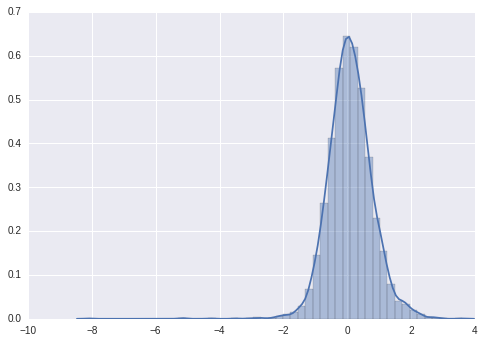

In [94]:
print cv.best_estimator_.steps[1][1].intercept_
sns.distplot(cv.best_estimator_.steps[1][1].coef_)

In [87]:
# sns.distplot(all_probas[0][:,1]

In [21]:
# from sklearn.manifold import TSNE
# tsne = TSNE(
#     n_components=2,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     n_iter=200,
#     verbose=2,
#     angle=0.9 # speed up computation a little
# ).fit_transform(tfidf.toarray())


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
features.classifications.
# encoded_classifications = LabelEncoder().fit_transform(features.classifications)
# encoded_classifications

SyntaxError: invalid syntax (<ipython-input-22-ad2c0e5cd1ca>, line 3)